In [1]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

housing=fetch_california_housing()
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [2]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
## Prepraing the dataset
data=pd.DataFrame(housing.data,columns=housing.feature_names)
data['Price']=housing.target

data.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
14895,2.1441,22.0,4.193980,1.112876,3222.0,2.693980,32.61,-117.07,1.355
429,4.1912,52.0,5.763285,0.966184,506.0,2.444444,37.88,-122.28,2.545
7929,3.7961,28.0,4.705357,1.058036,2997.0,3.344866,33.84,-118.08,1.627
2526,2.1650,34.0,5.304950,1.055446,1287.0,2.548515,39.53,-122.19,0.587
19525,1.1875,52.0,3.354430,1.120253,325.0,2.056962,37.64,-121.00,0.906


# Analyzing the dataSet

In [4]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


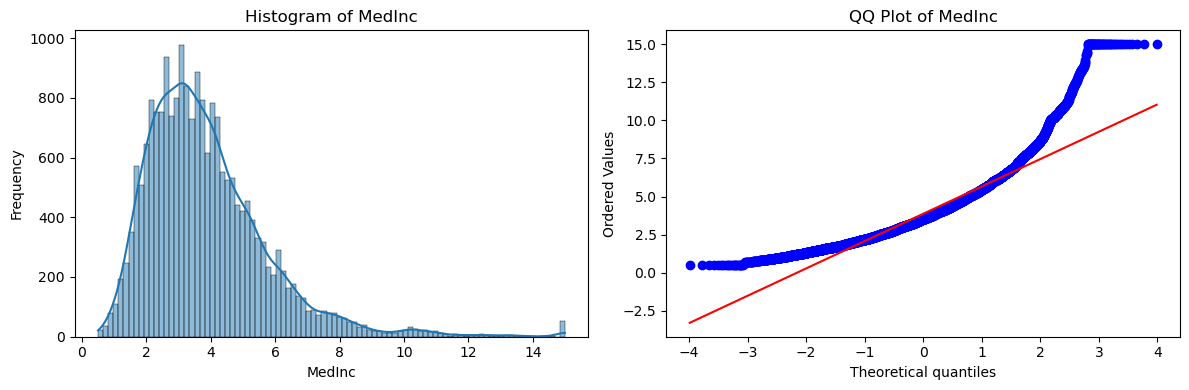

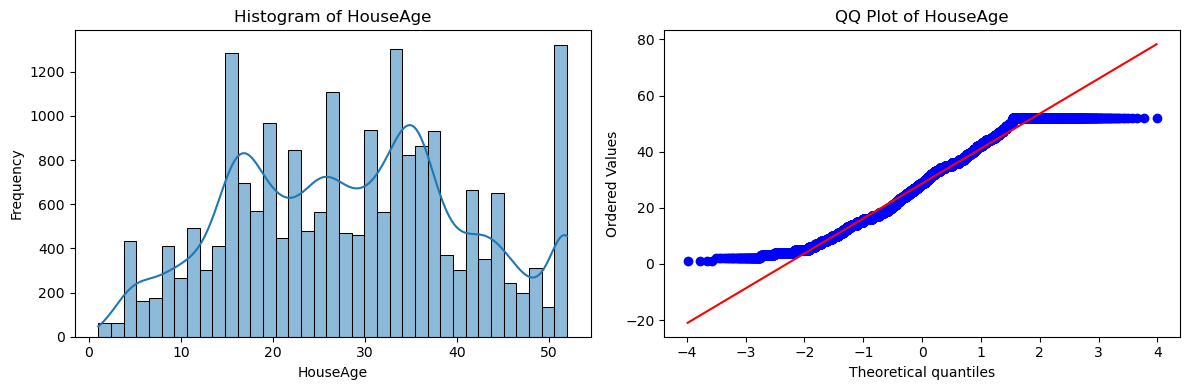

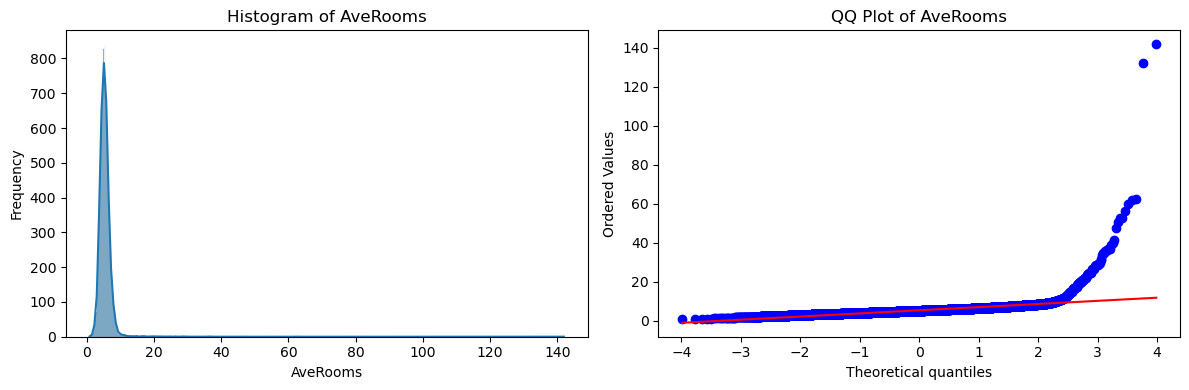

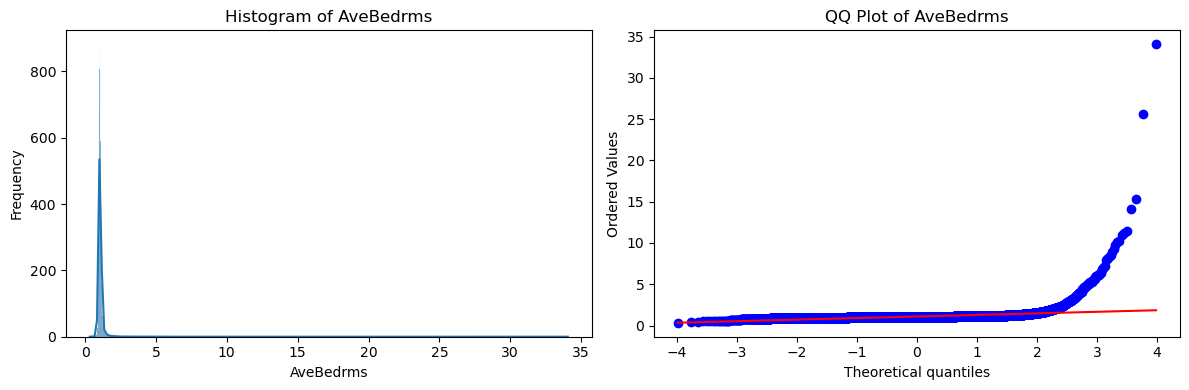

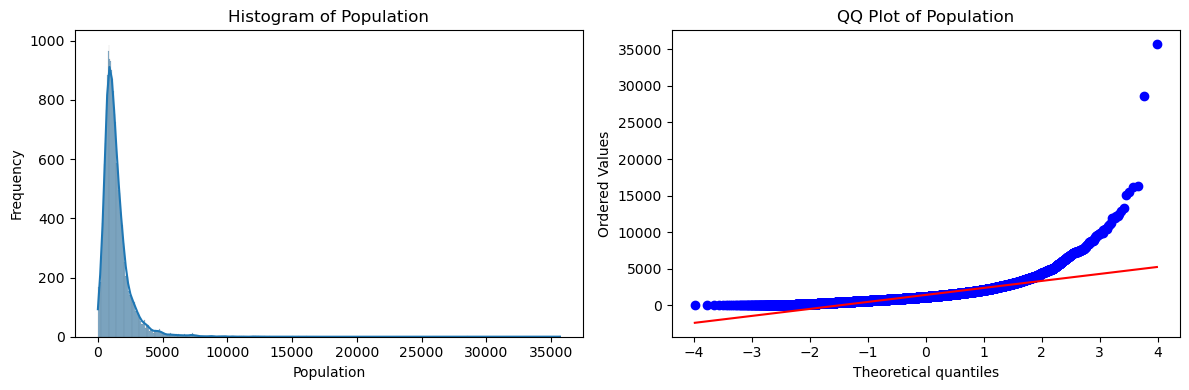

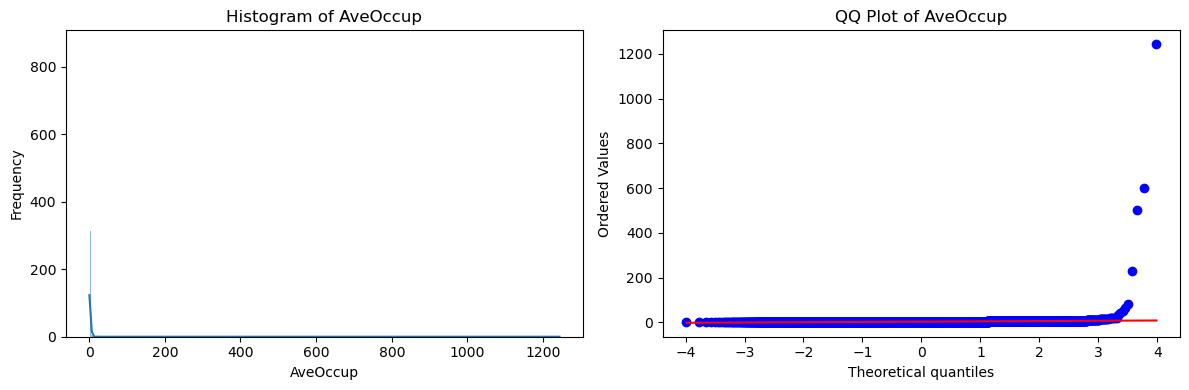

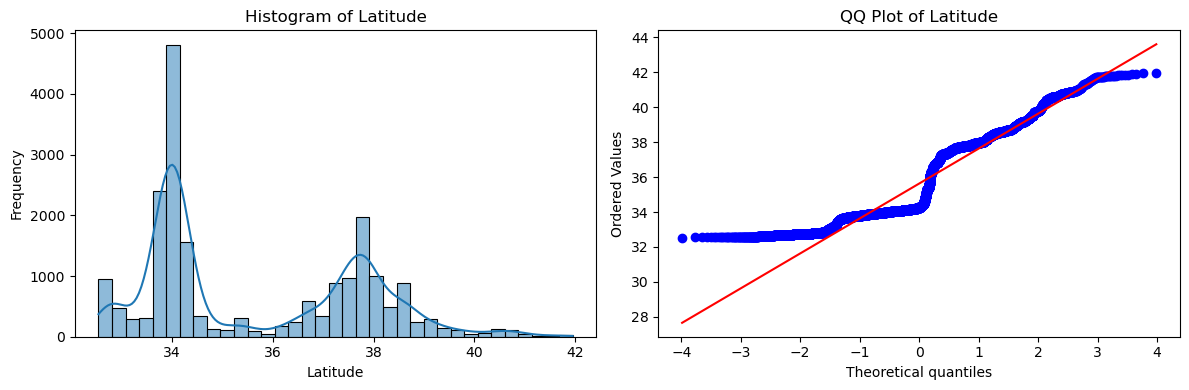

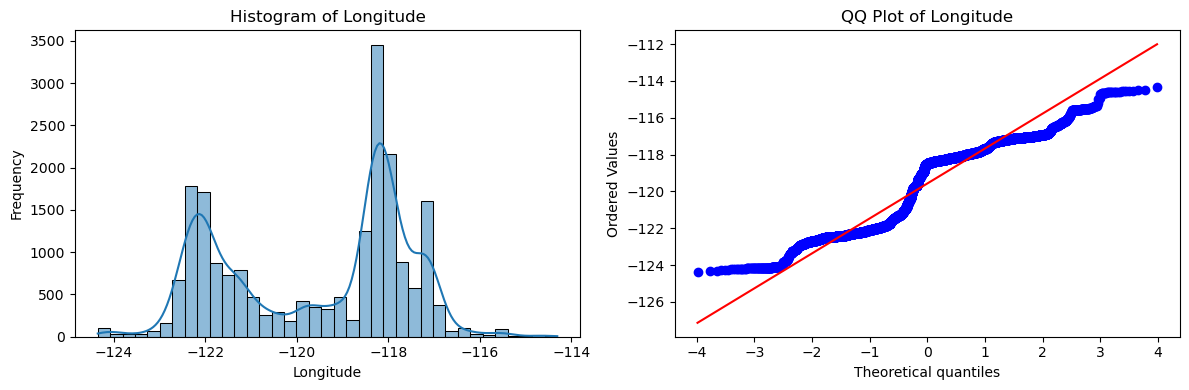

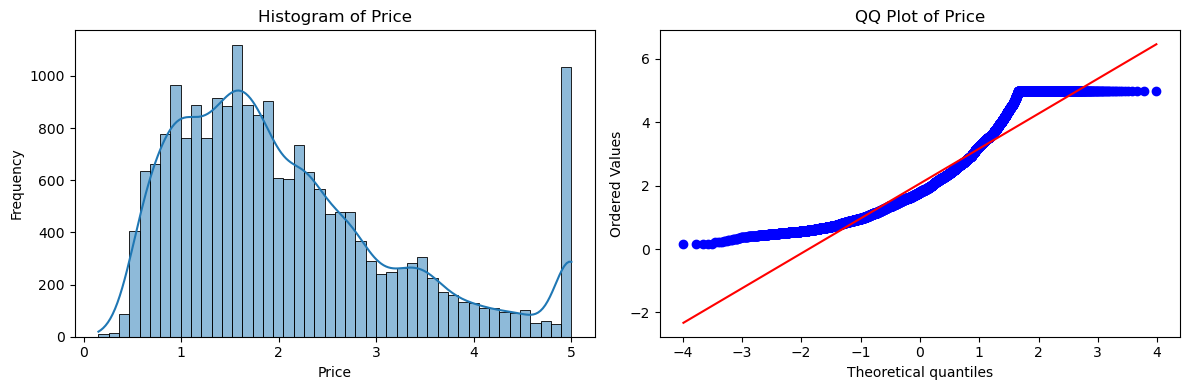

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

for i in data.columns:
    if data[i].dtype != 'O':  # Skip non-numeric (object) columns
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Histogram with KDE
        sns.histplot(data[i], kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {i}')
        axes[0].set_xlabel(i)
        axes[0].set_ylabel('Frequency')

        # QQ Plot
        stats.probplot(data[i].dropna(), dist="norm", plot=axes[1])
        axes[1].set_title(f'QQ Plot of {i}')

        plt.tight_layout()
        plt.show()


## I think for this right skewed distribution Log transformet is the best option(lop1p)

In [8]:
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer

In [9]:
data.sample(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
16964,4.6125,41.0,6.022472,1.007491,676.0,2.531835,37.53,-122.31,3.617


In [10]:
X = data.drop(columns='Price')
y=data['Price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# import numpy as np

# trf = ColumnTransformer(
#     transformers=[
#         ('log_transformer', FunctionTransformer(np.log1p), ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])
#     ],
#     remainder='passthrough'
# )


In [13]:
import numpy as np

In [14]:
cols_to_transform = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude']

# Step 1: Define transformer
trf = ColumnTransformer(
    transformers=[
        ('log_transformer', FunctionTransformer(np.log1p), cols_to_transform)
    ],
    remainder='passthrough'
)

# Step 2: Apply transformation
transformed_data = trf.fit_transform(data)

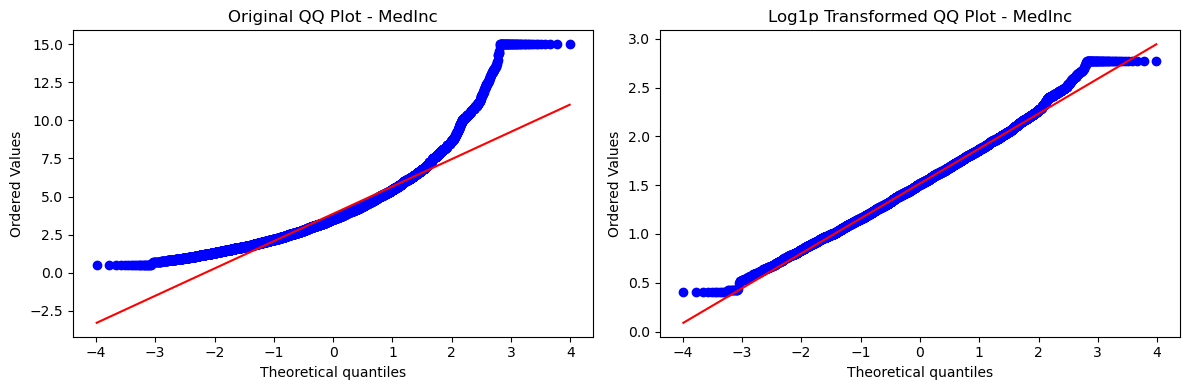

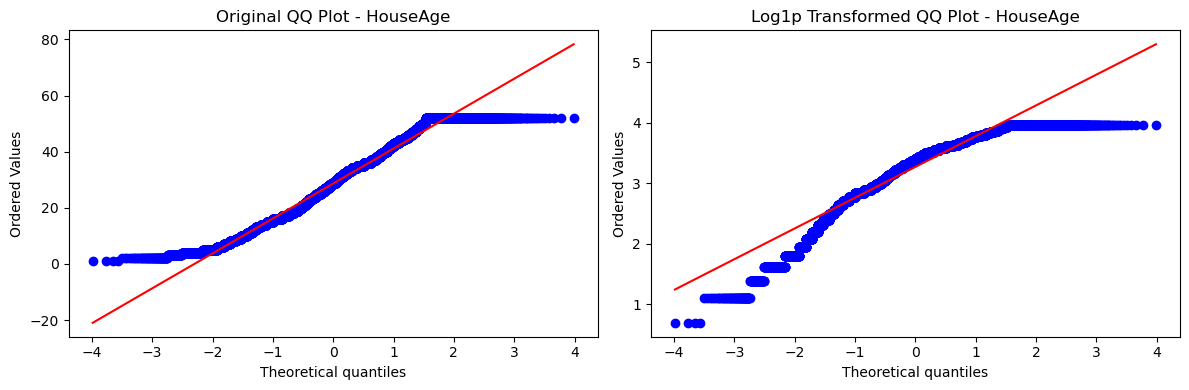

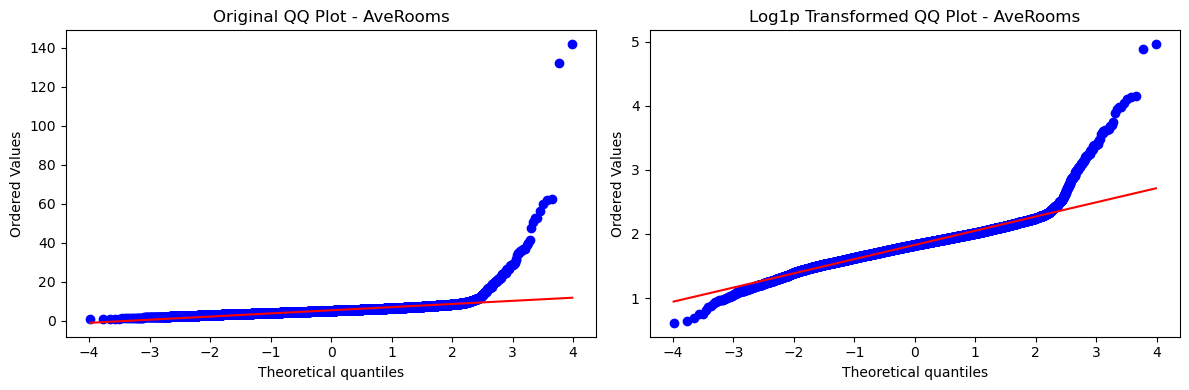

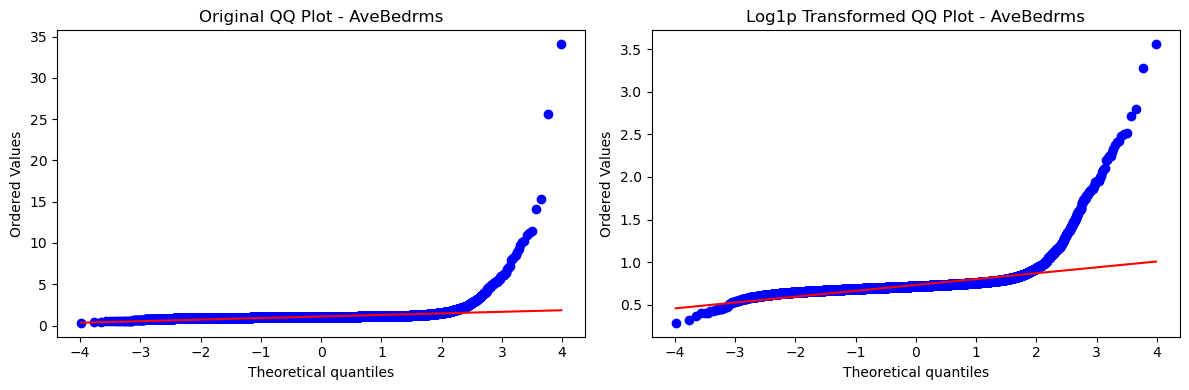

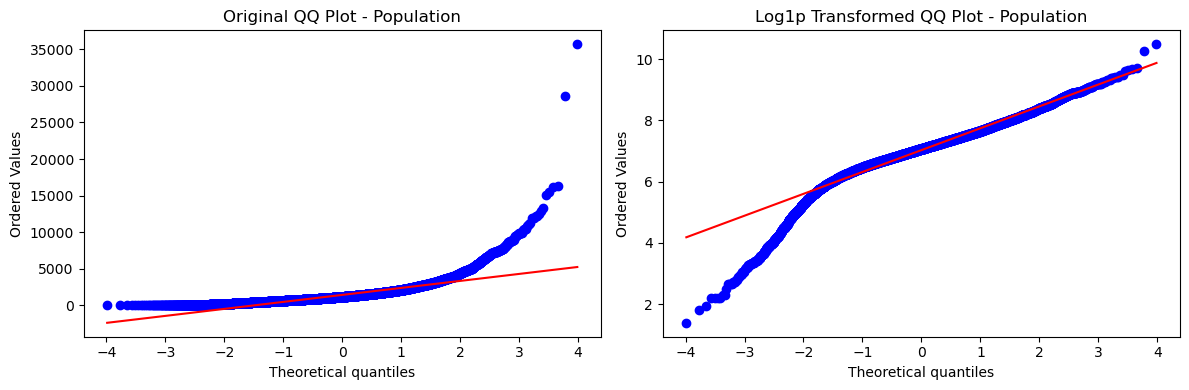

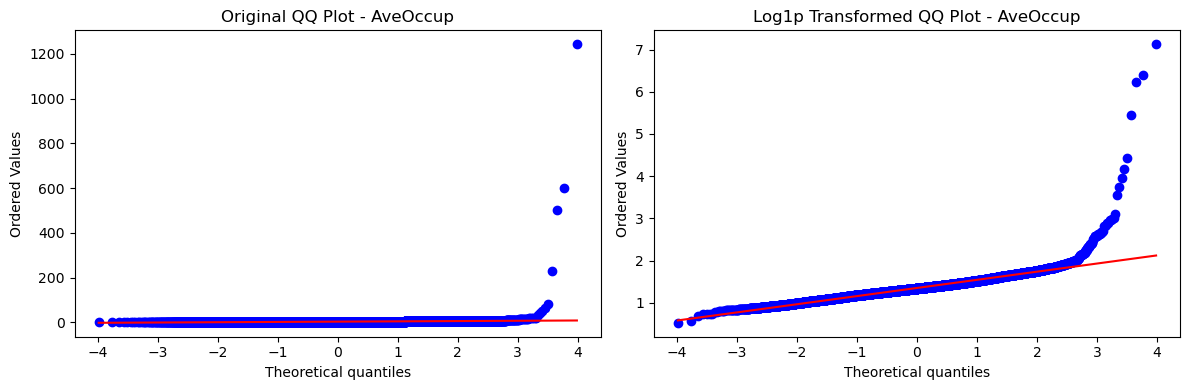

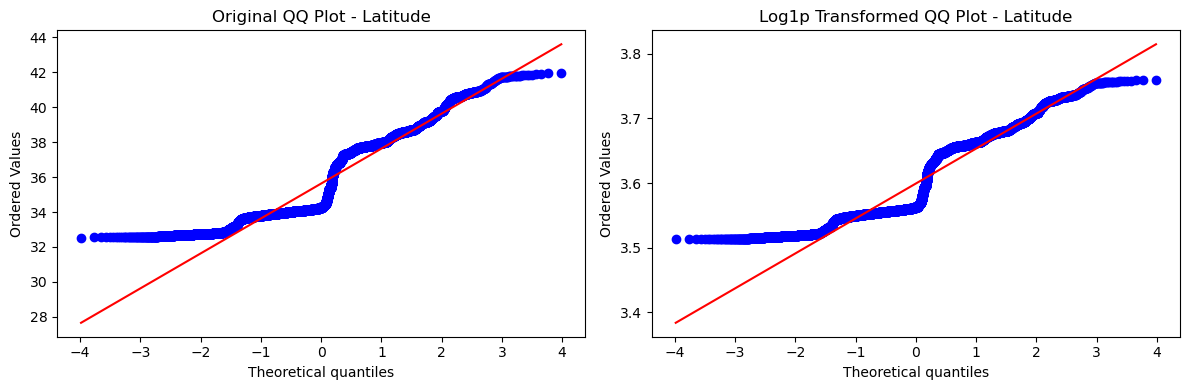

In [15]:
new_cols = cols_to_transform + [col for col in data.columns if col not in cols_to_transform]
transformed_df = pd.DataFrame(transformed_data, columns=new_cols)

# Step 4: Compare QQ plots
for col in cols_to_transform:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Original
    stats.probplot(data[col].dropna(), dist="norm", plot=axes[0])
    axes[0].set_title(f'Original QQ Plot - {col}')

    # Transformed
    stats.probplot(transformed_df[col].dropna(), dist="norm", plot=axes[1])
    axes[1].set_title(f'Log1p Transformed QQ Plot - {col}')

    plt.tight_layout()
    plt.show()

In [16]:
X_trian_tfr = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [18]:
from mlflow.models import infer_signature
signature = infer_signature(X_trian_tfr,y_train)

In [19]:
grid_params = {
    'n_estimators':[100,200],
    'max_depth':[5,10,None],
    'min_samples_split':[3,4],
    'min_samples_leaf':[1,2]
}

In [20]:
def hyper_tuning(X_trian_tfr,y_train,grid_params):
    rf=RandomForestRegressor()
    grid_search=GridSearchCV(estimator=rf,param_grid=grid_params,scoring='neg_mean_squared_error',n_jobs=-1,cv=4,verbose=5)
    grid_search.fit(X_trian_tfr,y_train)
    return grid_search


In [23]:
from sklearn.metrics import r2_score
from urllib.parse import urlparse
mlflow.set_experiment('House_price_Prediction')
with mlflow.start_run():
    grid_search=hyper_tuning(X_trian_tfr,y_train,grid_params)
    #get the best model 
    best_model = grid_search.best_estimator_


    #evaluate the best model
    y_pred=best_model.predict(X_test_trf)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)



    # log the parameter and metrix 
    mlflow.log_param("beat_n_estimators",grid_search.best_params_['n_estimators'])
    mlflow.log_param('best_max_depth' , grid_search.best_params_['max_depth'])
    mlflow.log_param('best_min_samples_split',grid_search.best_params_['min_samples_split'])
    mlflow.log_param('best_min_samples_leaf',grid_search.best_params_['min_samples_leaf'])


    # log the metrices

    mlflow.log_metric('Mean Squared Error',mse)
    mlflow.log_metric('r2_core',r2)

     # log the model 
    model_info = mlflow.sklearn.log_model(
        sk_model =rf,
        artifact_path = 'iris_model',
        signature=signature,
        input_example = X_train,
        # registered_model_name = 'tracking quickStart'
    )
    

     ## Tracking url
    mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
    tracking_url_type_store=urlparse(mlflow.get_tracking_uri()).scheme

    if tracking_url_type_store !='file':
        mlflow.sklearn.log_model(best_model,"model",registered_model_name="Best Randomforest Model")
    else:
        mlflow.sklearn.log_model(best_model,"model",signature=signature)

    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Mean Squared Error: {mse}")




Fitting 4 folds for each of 24 candidates, totalling 96 fits
🏃 View run exultant-worm-34 at: http://127.0.0.1:5000/#/experiments/614574421592467677/runs/74108868e21a4fb5bcc0aad0762f039d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/614574421592467677


NameError: name 'rf' is not defined